In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import quandl

In [103]:
# import reference df for regions
region_df = pd.read_csv(r'C:\Users\jacheung\Dropbox\Datasets\Zillow\ZILLOW-REGIONS.csv')
indicators_df = pd.read_csv(r'C:\Users\jacheung\Dropbox\Datasets\Zillow\ZILLOW_INDICATORS.csv')

la_region_id = region_df[region_df['region'].str.contains('Los Angeles', regex=False)]
la_region_id['region'].str.isdigit()

1173    False
1925    False
1926    False
1932    False
1933    False
        ...  
2792    False
2793    False
2794    False
2795    False
2796    False
Name: region, Length: 362, dtype: bool

In [99]:
quandl.ApiConfig.api_key = 'wX4VKujcwjcKqguwo1hR'
data = quandl.get_table('ZILLOW/DATA', indicator_id='ZSFH', region_id=str(la_region_id['region_id'].iloc[0]))
data.index = pd.to_datetime(data['date'],format='%m/%d/%y %I:%M%p')
data['value'] = data['value']/10**6

IndexError: too many indices for array

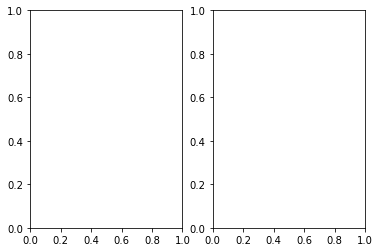

In [114]:
grouped_data = data.groupby(by=[data.index.year, data.index.month]).aggregate('median')
fig, axes = plt.subplots(nrows=1, ncols=2)

grouped_data.plot(subplots=True, layout=(1,2))
plt.ylabel('Price in millions (USD)')


grouped_data.pct_change(periods=12).plot(ax=axes[0,1])


ValueError: setting an array element with a sequence.

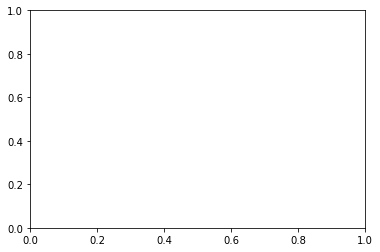

In [118]:
plt.plot(grouped_data['value'])